# Setup

In [1]:
# Import all the required libraries for the training phase

import data
import model
import utils
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm_notebook
import torchvision.models as models
from sklearn.metrics import accuracy_score

In [2]:
# Set the torch device to be cuba if available

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.empty_cache()

# Data Loading

In [3]:
# Load the dataset through custom dataset class 
# and data loader function from data.py

dataset = data.dataset(image_root = './DRIMDB')
train_loader, val_loader = data.dataloader(dataset = dataset, batch_size = 16, validation_split = 0.2, shuffle_dataset = True)

# Sample visualization

In [4]:
train_iter = iter(train_loader)

In [5]:
samples, labels, _ = train_iter.next()

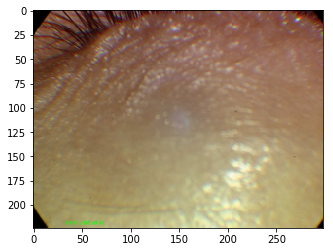

In [6]:
# Display a random sample for visualization 
# using imshow function present in utils.py

trial_num = np.random.randint(0, 1)
utils.imshow(samples[trial_num])

In [7]:
print(labels[trial_num])

Outlier


# Model

In [8]:
# Import the custom written AlexNet class from model.py

cnn = model.AlexNet(num_classes = 3).to(device)

In [9]:
# Architecture of the network

cnn.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4

In [10]:
# Here, we can visualise the layers which are 
# considered for weight updation

for param in cnn.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([64, 3, 11, 11])
torch.Size([64])
torch.Size([192, 64, 5, 5])
torch.Size([192])
torch.Size([384, 192, 3, 3])
torch.Size([384])
torch.Size([256, 384, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([4096, 9216])
torch.Size([4096])
torch.Size([4096, 4096])
torch.Size([4096])
torch.Size([3, 4096])
torch.Size([3])


# Training

In [11]:
# We choose the CrossEntropyLoss which is a standard 
# loss function for classification tasks.
# And the Stochastic Gradient Descent as optimizer

loss_fn = nn.CrossEntropyLoss()
optm = optim.SGD(cnn.parameters(), lr = 0.005)
n_epochs = 500

In [12]:
def train(n_epochs = n_epochs, loss_fn = loss_fn, optm = optm)
    # Arrays for book keeping of loss and accuracies
    loss_b = []
    acc_b = []

    loss_min = None

    for epoch in tqdm_notebook(range(n_epochs)):

        # Average of metrics throughout the epoch
        avg_loss = 0
        avg_acc = 0
        size = len(iter(train_loader))

        # Training loop
        for data in iter(train_loader):

            images, labels, _ = data
            images = images.to(device)

            # One Hot Encoding of the label
            OH_labels = utils.encode_batch(labels)
            pred = cnn.forward(images)

            # Calculate accuracy score
            cnn.eval()
            acc = accuracy_score(torch.max(pred, 1)[1].cpu(), torch.max(OH_labels, 1)[1].cpu())
            avg_acc += acc / size

            # Calculate Loss for gradient descent
            cnn.train()
            loss = loss_fn(pred, torch.max(OH_labels, 1)[1])
            avg_loss += loss.item() / size

            # Optimizer takes a step and weights are updates
            optm.zero_grad()
            loss.backward()
            optm.step()

            if loss_min == None:
                loss_min = loss.item()

            # Clear the space on cuda for next epoch
            del images, labels, OH_labels, pred
            torch.cuda.empty_cache()

        # Checkpoint the episode with least loss and reasonable train accuracy
    #     if avg_loss < loss_min and avg_acc > 0.85:
    #             loss_min = avg_loss
    #             print("Saving Checkpoint")
    #             torch.save(cnn.state_dict(), 'checkpoint.pth')

        # Book keeping
        loss_b.append(avg_loss)
        acc_b.append(avg_acc)
        print("|Epoch: {}/{}| |Loss: {:.4f}| |Train Acc: {:.4f}|".format(epoch, n_epochs, avg_loss, avg_acc))
        return(loss_b, acc_b)

loss_b, acc_b = train()

|Epoch: 0/300| |Loss: 1.0949| |Train Acc: 0.3842|
|Epoch: 1/300| |Loss: 1.0874| |Train Acc: 0.5520|
|Epoch: 2/300| |Loss: 1.0801| |Train Acc: 0.5533|
|Epoch: 3/300| |Loss: 1.0731| |Train Acc: 0.5573|
|Epoch: 4/300| |Loss: 1.0668| |Train Acc: 0.5559|
|Epoch: 5/300| |Loss: 1.0616| |Train Acc: 0.5520|
|Epoch: 6/300| |Loss: 1.0549| |Train Acc: 0.5546|
|Epoch: 7/300| |Loss: 1.0491| |Train Acc: 0.5546|
|Epoch: 8/300| |Loss: 1.0444| |Train Acc: 0.5533|
|Epoch: 9/300| |Loss: 1.0393| |Train Acc: 0.5520|
|Epoch: 10/300| |Loss: 1.0343| |Train Acc: 0.5559|
|Epoch: 11/300| |Loss: 1.0295| |Train Acc: 0.5573|
|Epoch: 12/300| |Loss: 1.0251| |Train Acc: 0.5559|
|Epoch: 13/300| |Loss: 1.0208| |Train Acc: 0.5559|
|Epoch: 14/300| |Loss: 1.0166| |Train Acc: 0.5559|
|Epoch: 15/300| |Loss: 1.0141| |Train Acc: 0.5507|
|Epoch: 16/300| |Loss: 1.0097| |Train Acc: 0.5546|
|Epoch: 17/300| |Loss: 1.0057| |Train Acc: 0.5546|
|Epoch: 18/300| |Loss: 1.0022| |Train Acc: 0.5559|
|Epoch: 19/300| |Loss: 0.9998| |Train Acc

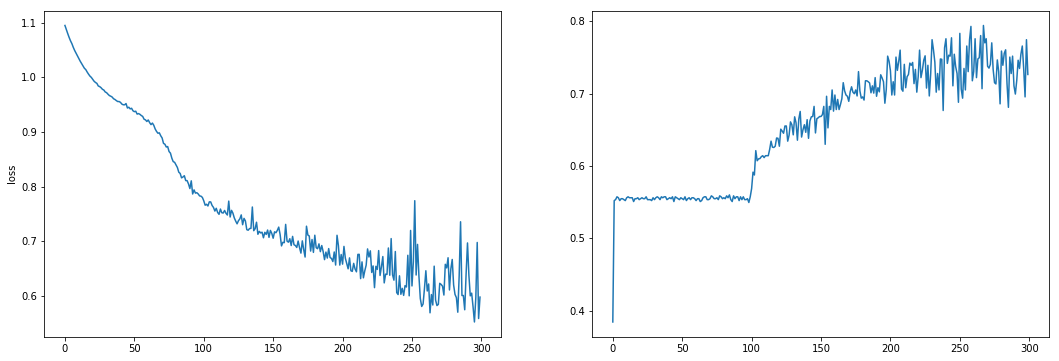

In [13]:
# Visualize the change in loss and accuracy throughout the training

utils.visualize_results(loss_b, acc_b)

# Evaluation

In [14]:
# Load the best checkpoint network weights for evaluation

cnn.load_state_dict(torch.load('checkpoint_min.pth'))
cnn.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4

In [16]:
# Accuaracy on the validation set

utils.evaluate(cnn, val_loader)

90.69767441860465
